# Now, Combining both lane_Finding & Region Masking
[Image Processing with scipy](http://www.scipy-lectures.org/advanced/image_processing/)<br>
[A really good brief overview on How we interpret an image in Image Processing feild](https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm)
>> 
<div class="alert alert-block alert-warning" style="text-align: justify"> <span style='color:purple'> **First I am interested to find a region of interest where my lane lines present,&nbsp; usually a 2-D triangle within the image. This narrow down my search in a 2-D world(thinking yourself as a camera world which is &nbsp;2-D correct, it projects 3-D objects into 2-D obejcts ..!!). Once, you cropped your area of interest, using color criterion i.e select&nbsp; a value in each color channel RGB, say 200(means very bright/white) and any value which is lesser than 200, put to zero&nbsp; ( i.e make it darkest explicitly, means black- out those pixel value.) Now, you have bunch of values in the numpy array of an image that has only bright pixel( with intensities > 200). Also, you have already narrow down you search scope so now you are just watching bright pixel&nbsp;&nbsp;(with criterion >200 in each RGB stacked together) which your white colored Lane-lines..WOW..!!! and you said the selected region pixels to be &nbsp;colored red for indentification purpose, so now those white/bright pixels (>200) will be colored RED.** </span> </div>

The type of the image: <class 'numpy.ndarray'> 
The camera, 3-D images image: (540, 960, 3) 
data type/depth of an image uint8 i.e dtype is uint8 for 8-bit images (0-255)


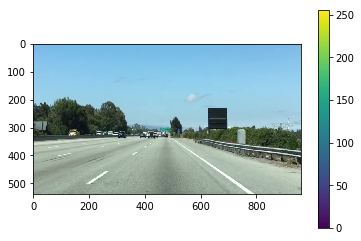

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# read the image & printing stats
image=mpimg.imread("datasets/test.jpg")
#this is an 2D IMAGE, which has 3 color channel array  for 
# print(image)
print('The type of the image:',type(image),\
      '\nThe camera, 3-D images image:',image.shape,\
      '\ndata type/depth of an image',image.dtype,'i.e dtype is uint8 for 8-bit images (0-255)' )
# A camera image is a combination of (:, :, 1) R + (:, :, 1) G + (:, :, 1) B == (:,:,3) RGB and we store a camera image which is a 
# array of array of array full of numbers of size each 8-bits. Therefore, we can perform any mathematical operation this array and indirectly
# getting a different form of new image

plt.imshow(image)
plt.colorbar()
plt.show()

In [2]:
#take a deep copy
y_size =image.shape[0]
x_size=image.shape[1] 
print(y_size, x_size)
color_select=np.copy(image)
line_image= np.copy(image)


540 960


### Defining **criterion** for both  lane_Finding & Region Masking.

In [3]:
# define region for masking criterion -- For Example: a triangle--->narrow down your scope of visibility
left_bottom = [120, 539]
right_bottom = [800, 539]
apex = [470, 300]
fit_left   = np.polyfit( (left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit( (left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
fit_right  = np.polyfit( (right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)      

# Define the color criterion
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold,green_threshold,blue_threshold]
# Mask the pixels below the threshold--> create a numpy 3D-array Tagging all the pixel value who has value < 200 as per criterion to TRUE
color_thresholds=(image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
print('color_thresholds dim',color_thresholds.shape)
# find the region inside the lines --> defining the area within the visibility i.e TRIANGLE.
XX, YY = np.meshgrid( np.arange(0,x_size), np.arange(0,y_size) )
region_thresholds =   ( YY > (XX* fit_left[0] + fit_left[1]) )\
                   & ( YY > (XX* fit_right[0] + fit_right[1]))\
                   & ( YY < (XX* fit_bottom[0] + fit_bottom[1]))


color_thresholds dim (540, 960)


> <div class="alert alert-block alert-warning">
<div style="text-align: justify"> 
<span style='color:purple'> **masking the color selection (for TRUE values black-out[0,0,0] pixel values in each channel in a copy of a main camera image ) this image has only white lane-lines visible, with some other objects which have cleared the criterion and are bright with intensities > 200 in each channel. We cannot stop them by increasing the threshold value, because if we increase the threshold above ~200 then we gonna black-out the bright pixels which are visible now on the lane-lines. You can play with the threshold to understand what I have written.**</div></div>

In [4]:
color_select[color_thresholds]=[0,0,0]
print('color_select Dim',color_select.shape)

color_select Dim (540, 960, 3)


>
<div class="alert alert-block alert-warning" style="text-align: justify,color:purple">
<span > **Therefore,a solution will be impose a triangualr region to narrow down our scope  of visibility, and removing those object that were not filtered in by the color-criterion and are problem in recognizing clear-lane lines.**</div>

 <span style='color:purple'>
**Find where image is both colored right and in the region taking False values from color_threshold(>200) gives only the bright lane lines + other crapy object explained above, alon with that we take TRUE values from region_threshold which has the chopped TRIANGULAR-REGION in RED color, what we get is a clear lane-lines colored in RED.</div></div>

The modified dimension after colored-criterion (540, 960, 3)


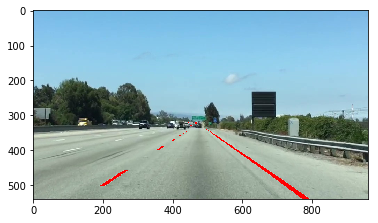

☺ ---Yeppppiee.. I have successfully identified white- lane lines clearly---☺


In [5]:
line_image[~color_thresholds & region_thresholds] = [255,0,0]
# line_image[region_thresholds] = [255,0,0]
# Display our two output images

# Black-out all the pixels which are <200--leading to white lane-lines + small crap which has pixel value >200.
plt.imshow(color_select)
print('The modified dimension after colored-criterion',color_select.shape)
# pick the bight pixel value >200 within a triangular region.
plt.imshow(line_image)
image=mpimg.imread("datasets/test.jpg")
plt.show()
print("\u263A ---Yeppppiee.. I have successfully identified white- lane lines clearly---\u263A")

# **Catch:**
> 
<div style="text-align: justify"> <span style='color:purple'>**there is an addition term/channel added within the inner vector RGB, why?**</div>
*  I think matplotlib.image.imsave saves the image in an RGBA format. try using cv2.imwrite to save the image. It worked..!!!

In [6]:
import cv2
print('The modified dimension after colored-criterion + region-criterion of numpy array',line_image.shape)
# writing to file.
# do not use matplotlib.image.imsave to save image, There gonna be a error of dimension mismatch.
# mpimg.imsave("datasets/fully_identiflied_laneLines", format='jpg', arr=line_image)
cv2.imwrite("datasets/fully_identiflied_laneLines.jpg", line_image)
# again fetching and checking the dimension. 
fetch_image=mpimg.imread("datasets/fully_identiflied_laneLines.jpg")
print('The modified dimension after colored-criterion + region-criterion of the numpy-array taken from the generated image',fetch_image.shape)


The modified dimension after colored-criterion + region-criterion of numpy array (540, 960, 3)
The modified dimension after colored-criterion + region-criterion of the numpy-array taken from the generated image (540, 960, 3)
